# Basic Oscillator to test numerical schemes

Staring with a very simple oscillator to test the accuracy and robustness of our numerical schemes before applying them to more complex problems.

$$
\frac{dv}{dt} = - x
$$
$$
\frac{dx}{dt} = v
$$

Spring constant = 1

Energy is a conserved quantity

$$
E = x^2 + v^2
$$

In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})
from IPython.core.display import HTML
HTML( open('my_css.css').read() )

In [2]:
##Define the equations as functions for use in the program

def func_ddt(q,a,b):
    return np.array([b*q[1],-a*q[0]])

# Schemes:

### 1st Order : Euler Forwards

$$\phi_{n+1} = \phi_n + \Delta t f(\phi_n)$$

$\phi$ will be represented by q in the code below (q = quantity)

In [3]:
# dqdt is a list of the stored time derivatives for q, stored in order from present to the past
#ie. f(q_n) = dqdt[0] ; f(q_n-1) = dqdt[1] ;...

#phi_... = q, delta t = dt, f(...) = dqdt[...]

#q is either x or v

###Euler Forwards
def euler1(q,dt,func,a,b):
    return np.array(q + dt*func(q,a,b))

###Forwards-Backwards
def forback(q,dt,func,a,b): 
    return np.array(q + dt*func(q+dt*func(q,a,b),a,b))
    
###Leapfrog
#Since leapfrog uses q_(n-1), we need to use a different scheme for the first time step as there is no q_(n-1)
#In this case we use the Euler Forwards scheme    
def leapfrogVar(qold,qmid,dtmid,dtold,func,a,b):
    l1 = (dtmid**2)*qold
    l2 = qmid*(dtmid**2 - dtold**2)
    l3 = (dtmid*dtold*(dtmid+dtold))
    l4 = 1/(dtold**2)
    return np.array(l4*(l1 - l2 + l3*func(qmid,a,b)))

def leapfrogCon(qold,qmid,dt,func,a,b):
    return np.array(qold + 2*dt*func(qmid,a,b))


###Runge-Kutta
def RK(dt,q,func,a,b): 
    s1 = dt*func(q,a,b)
    s2 = dt*func(q+s1/2,a,b)
    s3 = dt*func(q+s2/2,a,b)
    s4 = dt*func(q+s3,a,b)
    #print(s1,s2,s3,s4)
    return np.array(q + (s1 + 2*s2 + 2*s3 + s4)/6)

In [4]:
#Euler Forwards Time Stepper - Variable Stepping
def onestepVar(x,v,dt,dtStep,noStep,a,b,t=0):
    tArr,xArr,vArr = np.zeros(noStep+1),np.zeros(noStep+1),np.zeros(noStep+1)
    AccxArr,AccvArr = np.zeros(noStep+1),np.zeros(noStep+1)
    tArr[0],xArr[0],vArr[0] = t,x,v
    AccxArr[0] = x
    AccvArr[0] = v
    xvArr = np.zeros(2)
    xvArr[0] = x
    xvArr[1] = v
    stepNo = 0
    rta = math.sqrt(a)
    rtb = math.sqrt(b)
    
    for stepNo in range(1,noStep+1):
        xvArr = euler1(xvArr,dt,func_ddt,a,b)
        t += dt
        dt = dt*dtStep
        xArr[stepNo] = xvArr[0]
        vArr[stepNo] = xvArr[1]
        tArr[stepNo] = t
        AccxArr[stepNo] = math.cos(rta*rtb*t)
        AccvArr[stepNo] = -(rta*math.sin(rta*rtb*t))/rtb
    return xArr,vArr,tArr,AccxArr,AccvArr,dt

#Euler Forwards Time Stepper - Constant Stepping
def onestepCon(x,v,tStop,tStep,noStep,a,b,t=0):
    tArr,xArr,vArr = np.zeros(noStep+1),np.zeros(noStep+1),np.zeros(noStep+1)
    AccxArr,AccvArr = np.zeros(noStep+1),np.zeros(noStep+1)
    tArr[0],xArr[0],vArr[0] = t,x,v
    AccxArr[0] = x
    AccvArr[0] = v
    xvArr = np.zeros(2)
    xvArr[0] = x
    xvArr[1] = v
    stepNo = 0
    rta = math.sqrt(a)
    rtb = math.sqrt(b)
    
    for stepNo in range(1,noStep+1):
        xvArr = euler1(xvArr,tStep,func_ddt,a,b)
        t += tStep    
        xArr[stepNo] = xvArr[0]
        vArr[stepNo] = xvArr[1]
        tArr[stepNo] = t
        AccxArr[stepNo] = math.cos(rta*rtb*t)
        AccvArr[stepNo] = -(rta*math.sin(rta*rtb*t))/rtb
    return xArr,vArr,tArr,AccxArr,AccvArr

#Forwards-Backwards time stepper - Variable Stepping
def twostepVar(x,v,dt,dtStep,noStep,a,b,t=0):
    tArr,xArr,vArr = np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1)
    AccxArr,AccvArr = np.zeros(noStep +1),np.zeros(noStep +1)
    tArr[0],xArr[0],vArr[0] = t,x,v
    AccxArr[0] = x
    AccvArr[0] = v
    xvArr = np.zeros(2)
    xvArr[0] = x
    xvArr[1] = v
    stepNo = 0
    rta = math.sqrt(a)
    rtb = math.sqrt(b)
    
    for stepNo in range(1,noStep+1):
        xvArr = forback(xvArr,dt,func_ddt,a,b)
        t += dt   
        dt = dt*dtStep
        xArr[stepNo] = xvArr[0]
        vArr[stepNo] = xvArr[1]
        tArr[stepNo] = t
        AccxArr[stepNo] = math.cos(rta*rtb*t)
        AccvArr[stepNo] = -(rta*math.sin(rta*rtb*t))/rtb
    return xArr,vArr,tArr,AccxArr,AccvArr,dt

#Forwards-Backwards time stepper - Constant Stepping
def twostepCon(x,v,tStop,tStep,noStep,a,b,t=0):
    tArr,xArr,vArr = np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1)
    AccxArr,AccvArr = np.zeros(noStep +1),np.zeros(noStep +1)
    tArr[0],xArr[0],vArr[0] = t,x,v
    AccxArr[0] = x
    AccvArr[0] = v
    xvArr = np.zeros(2)
    xvArr[0] = x
    xvArr[1] = v
    stepNo = 0
    rta = math.sqrt(a)
    rtb = math.sqrt(b)
    
    for stepNo in range(1,noStep+1):
        xvArr = forback(xvArr,tStep,func_ddt,a,b)
        t += tStep    
        xArr[stepNo] = xvArr[0]
        vArr[stepNo] = xvArr[1]
        tArr[stepNo] = t
        AccxArr[stepNo] = math.cos(rta*rtb*t)
        AccvArr[stepNo] = -(rta*math.sin(rta*rtb*t))/rtb
    return xArr,vArr,tArr,AccxArr,AccvArr
    
    
#Leapfrog time stepper - Variable Stepping
def threestepVar(x,v,dt,dtStep,noStep,a,b,t=0):
    tArr,xArr,vArr = np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1)
    AccxArr,AccvArr = np.zeros(noStep +1),np.zeros(noStep +1)
    tArr[0],xArr[0],vArr[0] = t,x,v
    AccxArr[0] = x
    AccvArr[0] = v
    xvArr = np.zeros(2)
    xvArr[0] = x
    xvArr[1] = v
    stepNo = 0
    dtprev = 0
    rta = math.sqrt(a)
    rtb = math.sqrt(b)
    
    for stepNo in range(1,noStep+1):
        if stepNo >= 2:
            xvArr = leapfrogVar(np.array([xArr[stepNo-2],vArr[stepNo-2]]),xvArr,dt,dtprev,func_ddt,a,b)
        else:
            xvArr = euler1(xvArr,dt,func_ddt,a,b)
        t += dt  
        dtprev = dt
        dt = dt*dtStep
        xArr[stepNo] = xvArr[0]
        vArr[stepNo] = xvArr[1]
        tArr[stepNo] = t
        AccxArr[stepNo] = math.cos(rta*rtb*t)
        AccvArr[stepNo] = -(rta*math.sin(rta*rtb*t))/rtb
    return xArr,vArr,tArr,AccxArr,AccvArr,dt

#Leapfrog time stepper - Constant Stepper
def threestepCon(x,v,tStop,tStep,noStep,a,b,t=0):
    tArr,xArr,vArr = np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1)
    AccxArr,AccvArr = np.zeros(noStep +1),np.zeros(noStep +1)
    tArr[0],xArr[0],vArr[0] = t,x,v
    AccxArr[0] = x
    AccvArr[0] = v
    xvArr = np.zeros(2)
    xvArr[0] = x
    xvArr[1] = v
    stepNo = 0
    rta = math.sqrt(a)
    rtb = math.sqrt(b)
    
    for stepNo in range(1,noStep+1): #[stepNo] = n+1, [stepNo-1] = xvArr = n, [stepNo-2] = n-1
        if stepNo >= 2:
            xvArr = leapfrogCon([xArr[stepNo-2],vArr[stepNo-2]],xvArr,tStep,func_ddt,a,b)
        else:
            xvArr = euler1(xvArr,tStep,func_ddt,a,b)
        t += tStep    
        xArr[stepNo] = xvArr[0]
        vArr[stepNo] = xvArr[1]
        tArr[stepNo] = t
        AccxArr[stepNo] = math.cos(rta*rtb*t)
        AccvArr[stepNo] = -(rta*math.sin(rta*rtb*t))/rtb
    return xArr,vArr,tArr,AccxArr,AccvArr
    
#Runge-Kutta (4-Step) time stepper - Variable Stepping
def fourstepVar(x,v,dt,dtStep,noStep,a,b,t=0):
    tArr,xArr,vArr = np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1)
    AccxArr,AccvArr = np.zeros(noStep +1),np.zeros(noStep +1)
    tArr[0],xArr[0],vArr[0] = t,x,v
    AccxArr[0] = x
    AccvArr[0] = v
    xvArr = np.zeros(2)
    xvArr[0] = x
    xvArr[1] = v
    stepNo = 0
    rta = math.sqrt(a)
    rtb = math.sqrt(b)
    
    for stepNo in range(1,noStep+1):
        xvArr = RK(dt,xvArr,func_ddt,a,b)
        t += dt  
        dt = dt*dtStep
        xArr[stepNo] = xvArr[0]
        vArr[stepNo] = xvArr[1]
        tArr[stepNo] = t
        AccxArr[stepNo] = math.cos(rta*rtb*t)
        AccvArr[stepNo] = -(rta*math.sin(rta*rtb*t))/rtb
    return xArr,vArr,tArr,AccxArr,AccvArr,dt

#Runge-Kutta (4-Step) time stepper - Constant Stepping
def fourstepCon(x,v,tStop,tStep,noStep,a,b,t=0):
    tArr,xArr,vArr = np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1)
    AccxArr,AccvArr = np.zeros(noStep +1),np.zeros(noStep +1)
    tArr[0],xArr[0],vArr[0] = t,x,v
    AccxArr[0] = x
    AccvArr[0] = v
    xvArr = np.zeros(2)
    xvArr[0] = x
    xvArr[1] = v
    stepNo = 0
    rta = math.sqrt(a)
    rtb = math.sqrt(b)
    
    for stepNo in range(1,noStep+1):
        xvArr = RK(tStep,xvArr,func_ddt,a,b)
        t += tStep  
        xArr[stepNo] = xvArr[0]
        vArr[stepNo] = xvArr[1]
        tArr[stepNo] = t
        AccxArr[stepNo] = math.cos(rta*rtb*t)
        AccvArr[stepNo] = -(rta*math.sin(rta*rtb*t))/rtb
    return xArr,vArr,tArr,AccxArr,AccvArr

def highres(x,v,tStop,tStep,noStep,a,b,t=0):
    tArr,xArr,vArr = np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1)
    tArr[0],xArr[0],vArr[0] = t,x,v
    stepNo = 0
    rta = math.sqrt(a)
    rtb = math.sqrt(b)
    
    for stepNo in range(1,noStep+1):
        t += tStep 
        xArr[stepNo] = math.cos(rta*rtb*t)
        vArr[stepNo] = -(rta*math.sin(rta*rtb*t))/rtb
        tArr[stepNo] = t
    return xArr,vArr,tArr

# Start Here for Experiments

In [151]:
#define stuff
scheme = 2
mode = 'var'
nsteps = 100
timestop = 2*math.pi
maxtimestep = 0.5
initialtimestep = 0.0437030099197277     #From spreadsheet
initialX = 1.0
initialV = 0.0
alpha = 1.0     #set alpha & beta to 1 for circle
beta = 1.0
timestep = timestop/nsteps
timestepstep = 1.00695555005672  #From spreadsheet
if mode == 'var':
    print("The time step multiplier is",timestepstep)
elif mode == 'con':
    print("The time step is",timestep)
elif scheme == 'HR':
    print("The time step for the high resolution run is",timestep)

The time step multiplier is 1.00695555005672


In [152]:
if scheme == 1:
    if mode == 'var':
        VplotX,VplotV,VplotT,VplotAX,VplotAV,VplotDTF = onestepVar(initialX,initialV,initialtimestep,timestepstep,nsteps,alpha,beta)
    elif mode == 'con':
        CplotX,CplotV,CplotT,CplotAX,CplotAV = onestepCon(initialX,initialV,timestop,timestep,nsteps,alpha,beta)
    schemename = "Euler Forwards"
elif scheme == 2:
    if mode == 'var':
        VplotX,VplotV,VplotT,VplotAX,VplotAV,VplotDTF = twostepVar(initialX,initialV,initialtimestep,timestepstep,nsteps,alpha,beta)
    elif mode == 'con':
        CplotX,CplotV,CplotT,CplotAX,CplotAV = twostepCon(initialX,initialV,timestop,timestep,nsteps,alpha,beta)
    schemename = "Forwards Backwards"
elif scheme == 3:
    if mode == 'var':
        VplotX,VplotV,VplotT,VplotAX,VplotAV,VplotDTF = threestepVar(initialX,initialV,initialtimestep,timestepstep,nsteps,alpha,beta)
    elif mode == 'con':
        CplotX,CplotV,CplotT,CplotAX,CplotAV = threestepCon(initialX,initialV,timestop,timestep,nsteps,alpha,beta)
    schemename = "Leapfrog"
elif scheme == 4:
    if mode == 'var':
        VplotX,VplotV,VplotT,VplotAX,VplotAV,VplotDTF = fourstepVar(initialX,initialV,initialtimestep,timestepstep,nsteps,alpha,beta)
    elif mode == 'con':
        CplotX,CplotV,CplotT,CplotAX,CplotAV = fourstepCon(initialX,initialV,timestop,timestep,nsteps,alpha,beta)
    schemename = "Runge-Kutta (4-Step)"
elif scheme == 'HR':
    HplotX,HplotV,HplotT = highres(initialX,initialV,timestop,timestep,nsteps,alpha,beta)
#print("No. Steps taken was",len(plotX)-1,"steps")
#print("The total time forecast was :",plotT[-1])
#print("The total number of revolutions was:",plotT[-1]/(2*math.pi))
#print("The final time step was:",plotDT[-1])

In [153]:
#Verror1 = [abs(math.sqrt((a)**2 + (b)**2)-1) for a,b in zip(VplotX1,VplotV1)]
#Verror2 = [abs(math.sqrt((a)**2 + (b)**2)-1) for a,b in zip(VplotX2,VplotV2)]
#Verror3 = [abs(math.sqrt((a)**2 + (b)**2)-1) for a,b in zip(VplotX3,VplotV3)]
#Verror4 = [abs(math.sqrt((a)**2 + (b)**2)-1) for a,b in zip(VplotX4,VplotV4)]
#Verror5 = [abs(math.sqrt((a)**2 + (b)**2)-1) for a,b in zip(VplotX5,VplotV5)]
#Cerror = [abs(math.sqrt((a)**2 + (b)**2)-1) for a,b in zip(CplotX,CplotV)]
#print (len(error), len(plotT))    
#figE, axesE = plt.subplots(nrows=1,ncols=1,figsize=(18,6)) 
#axesE.semilogy(CplotT,Cerror,'k-',label='$\Delta t$ = 0.0062')
#axesE.semilogy(VplotT1,Verror1,'b-',label='$\lambda$ = 1.0070')
#axesE.semilogy(VplotT2,Verror2,'r-',label='$\lambda$ = 1.0110')
#axesE.semilogy(VplotT3,Verror3,'m-',label='$\lambda$ = 1.0140')
#axesE.semilogy(VplotT4,Verror4,'y-',label='$\lambda$ = 1.0162')
#axesE.semilogy(VplotT5,Verror5,'c-',label='$\lambda$ = 1.0181')
#axesE.set_title('Error for various $\lambda$ ('+schemename+')')
#axesE.set_xlabel('Time')
#axesE.set_ylabel('Error in Radius')
#axesE.grid()
#axesE.set_xlim(3,3.5)
#axesE.set_ylim(0.005,0.02)
#axesE.legend(ncol=2,loc=4)
#figE.tight_layout()
#if scheme == 1:
#    figE.savefig('Exp - EF - V3.png')
#elif scheme == 2:
#    figE.savefig('Exp - FB - V3.png')
#elif scheme == 3:
#    figE.savefig('Exp - LF - V3.png')
#elif scheme == 4:
#    figE.savefig('Exp - RK - V3.png')

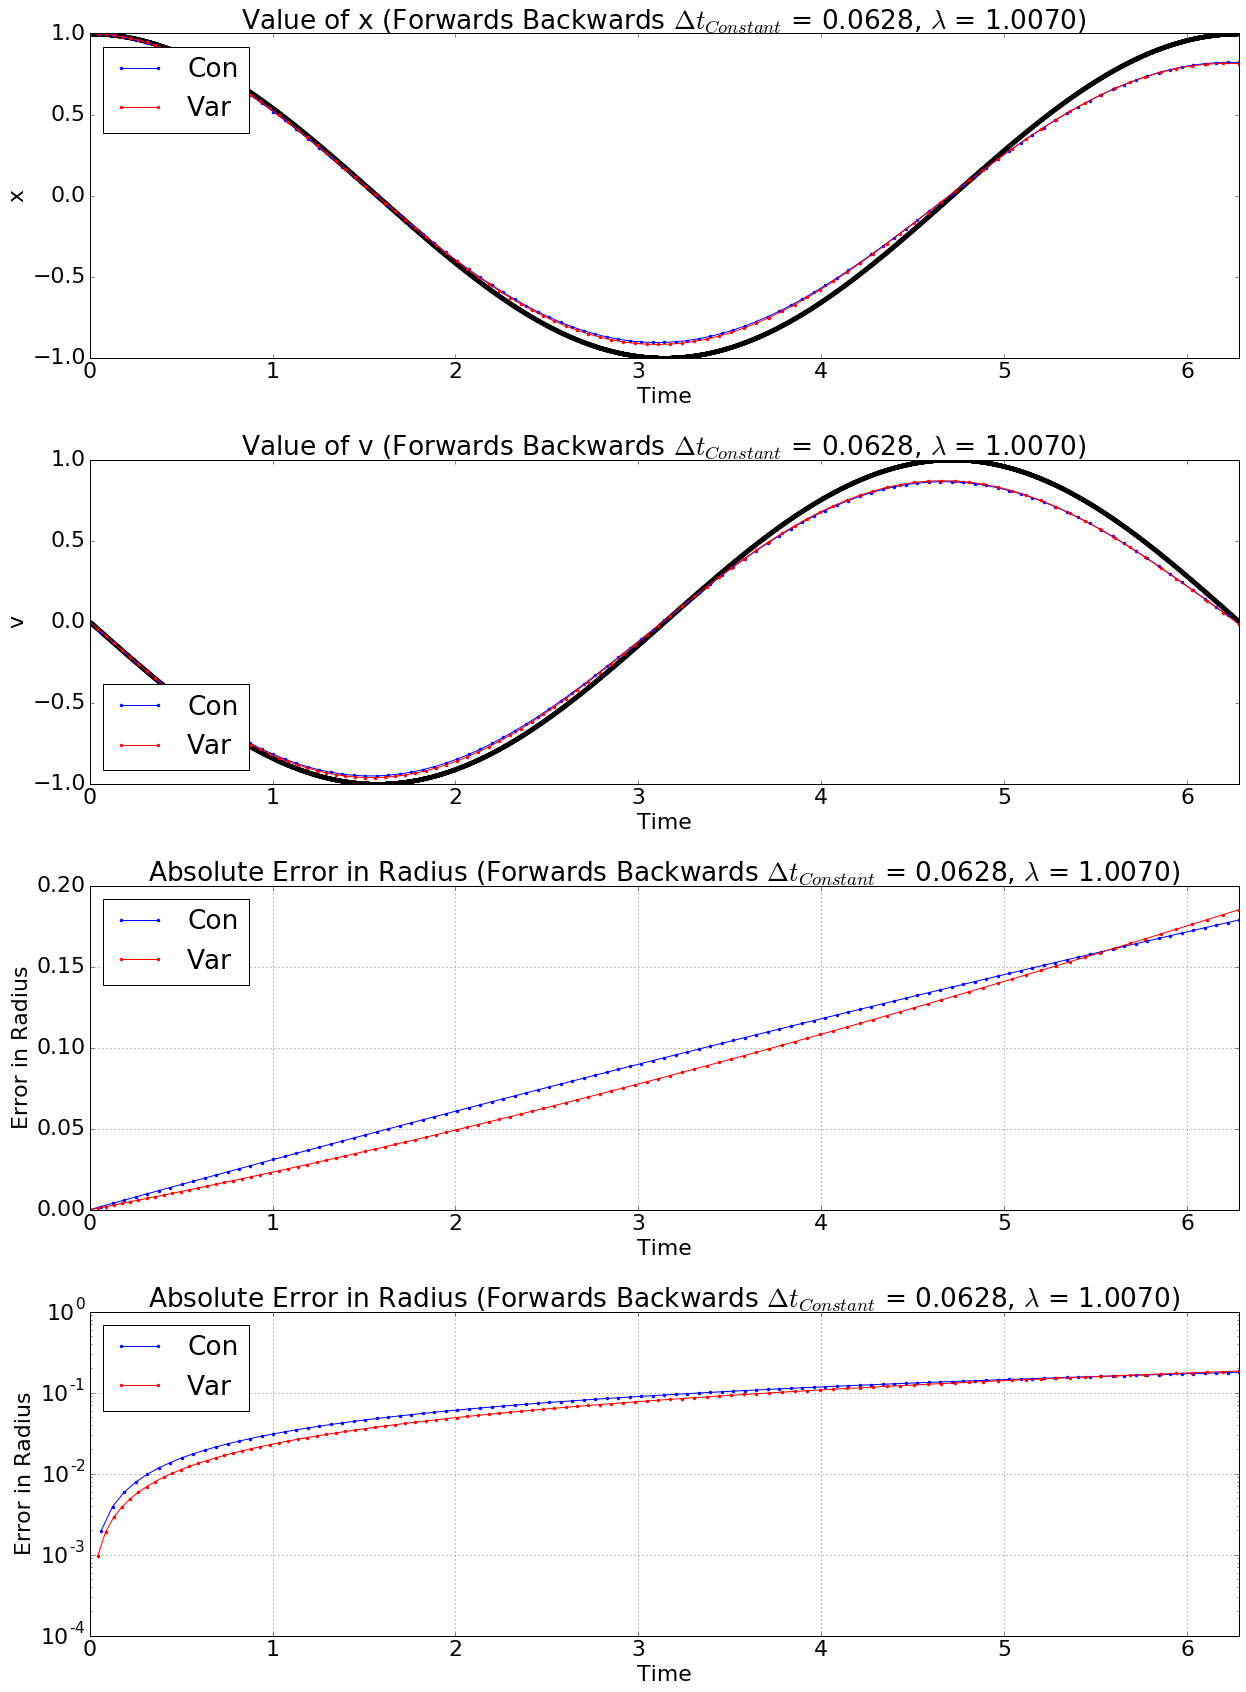

In [154]:
#Verror = [math.sqrt((a-c)**2 + (b-d)**2) for a,b,c,d in zip(VplotX,VplotV,VplotAX,VplotAV)]
#Cerror = [math.sqrt((a-c)**2 + (b-d)**2) for a,b,c,d in zip(CplotX,CplotV,CplotAX,CplotAV)]
Verror = [abs(math.sqrt((a)**2 + (b)**2)-1) for a,b in zip(VplotX,VplotV)]
Cerror = [abs(math.sqrt((a)**2 + (b)**2)-1) for a,b in zip(CplotX,CplotV)]
#print (len(error), len(plotT))    
figE, axesE = plt.subplots(nrows=4,ncols=1,figsize=(18,24)) 
axesE[0].plot(HplotT,HplotX,'k.-')
axesE[0].plot(CplotT,CplotX,'b.-',label='Con')
axesE[0].plot(VplotT,VplotX,'r.-',label='Var')
axesE[0].set_title('Value of x ('+schemename+' $\Delta t_{Constant}$ = '+"%.4f" % timestep+', $\lambda$ = '+"%.4f" % timestepstep+')')
axesE[0].set_xlabel('Time')
axesE[0].set_ylabel('x')
axesE[0].set_xlim(0,timestop)
axesE[0].legend(loc=2)
axesE[1].plot(HplotT,HplotV,'k.-')
axesE[1].plot(CplotT,CplotV,'b.-',label='Con')
axesE[1].plot(VplotT,VplotV,'r.-',label='Var')
axesE[1].set_title('Value of v ('+schemename+' $\Delta t_{Constant}$ = '+"%.4f" % timestep+', $\lambda$ = '+"%.4f" % timestepstep+')')
axesE[1].set_xlabel('Time')
axesE[1].set_ylabel('v')
axesE[1].set_xlim(0,timestop)
axesE[1].legend(loc=3)
axesE[2].plot(CplotT,Cerror,'b.-',label='Con')
axesE[2].plot(VplotT,Verror,'r.-',label='Var')
axesE[2].set_title('Absolute Error in Radius ('+schemename+' $\Delta t_{Constant}$ = '+"%.4f" % timestep+', $\lambda$ = '+"%.4f" % timestepstep+')')
axesE[2].set_xlabel('Time')
axesE[2].set_ylabel('Error in Radius')
axesE[2].grid()
axesE[2].set_xlim(0,timestop)
axesE[2].legend(loc=2)
axesE[3].semilogy(CplotT,Cerror,'b.-',label='Con')
axesE[3].semilogy(VplotT,Verror,'r.-',label='Var')
axesE[3].set_title('Absolute Error in Radius ('+schemename+' $\Delta t_{Constant}$ = '+"%.4f" % timestep+', $\lambda$ = '+"%.4f" % timestepstep+')')
axesE[3].set_xlabel('Time')
axesE[3].set_ylabel('Error in Radius')
axesE[3].grid()
axesE[3].set_xlim(0,timestop)
axesE[3].legend(loc=2)
figE.tight_layout()
if scheme == 1:
    figE.savefig('EF - V1.png')
elif scheme == 2:
    figE.savefig('FB - V1.png')
elif scheme == 3:
    figE.savefig('LF - V1.png')
elif scheme == 4:
    figE.savefig('RK - V1.png')

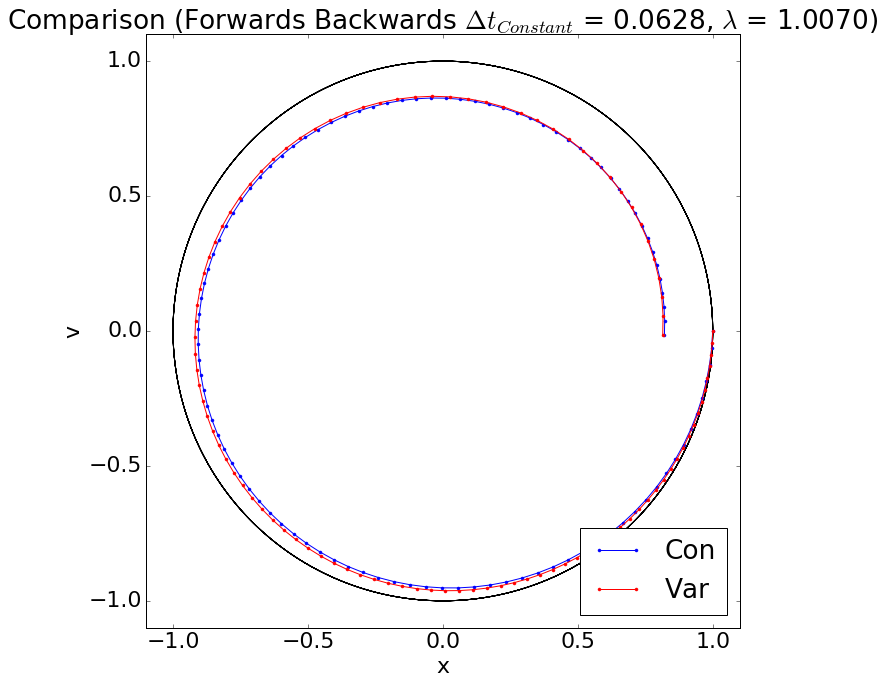

In [156]:
figF, axesF = plt.subplots(nrows=1,ncols=1,figsize=(18,10))
#axesF[0].plot(HplotX,HplotV)
#axesF[0].set(adjustable='box-forced', aspect='equal')
#axesF[0].set_xlabel('x')
#axesF[0].set_ylabel('v')
#axesF[0].set_title('High Res Analytical')
#axesF[0].set_xlim(min(HplotX)-0.1,max(HplotX)+0.1)
#axesF[0].set_ylim(min(HplotV)-0.1,max(HplotV)+0.1)
#axesF[1].plot(CplotX,CplotV)
#axesF[1].set(adjustable='box-forced', aspect='equal')
#axesF[1].set_xlabel('x')
#axesF[1].set_ylabel('v')
#axesF[1].set_title('Constant ('+schemename+' Con dt = '+"%.4f" % timestep+')')
#axesF[1].set_xlim(min(CplotX)-0.1,max(CplotX)+0.1)
#axesF[1].set_ylim(min(CplotV)-0.1,max(CplotV)+0.1)
#axesF[2].plot(VplotX,VplotV)
#axesF[2].set(adjustable='box-forced', aspect='equal')
#axesF[2].set_xlabel('x')
#axesF[2].set_ylabel('v')
#axesF[2].set_title('Variable ('+schemename+' Var dt final = '+"%.4f" % VplotDTF+')')
#axesF[2].set_xlim(min(VplotX)-0.1,max(VplotX)+0.1)
#axesF[2].set_ylim(min(VplotV)-0.1,max(VplotV)+0.1)
axesF.plot(HplotX,HplotV,'k-')
axesF.plot(CplotX,CplotV,'b.-',label='Con')
axesF.plot(VplotX,VplotV,'r.-',label='Var')
axesF.set(adjustable='box-forced', aspect='equal')
axesF.set_xlabel('x')
axesF.set_ylabel('v')
axesF.set_title('Comparison ('+schemename+' $\Delta t_{Constant}$ = '+"%.4f" % timestep+', $\lambda$ = '+"%.4f" % timestepstep+')')
axesF.set_xlim(min(HplotX)-0.1,max(HplotX)+0.1)
axesF.set_ylim(min(HplotV)-0.1,max(HplotV)+0.1)
axesF.legend(loc=4)
figF.tight_layout()
if scheme == 1:
    figF.savefig('EF - V2.png')
elif scheme == 2:
    figF.savefig('FB - V2.png')
elif scheme == 3:
    figF.savefig('LF - V2.png')
elif scheme == 4:
    figF.savefig('RK - V2.png')

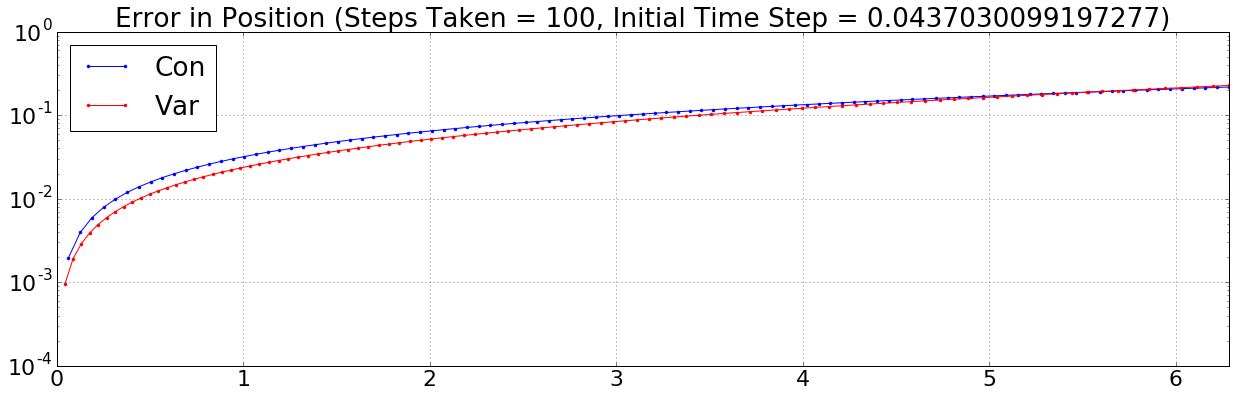

In [171]:
figG, axesG = plt.subplots(nrows=1,ncols=1,figsize=(18,6))
axesG.semilogy(CplotT,Cerror,'b.-',label='Con')
axesG.semilogy(VplotT,Verror,'r.-',label='Var')
axesG.set_title('Error in Position (Steps Taken = '+str(nsteps)+', Initial Time Step = '+str(initialtimestep)+')')
axesG.grid()
axesG.set_xlim(0,timestop)
axesG.legend(loc=2)
figG.tight_layout()
figG.savefig('RK - V3.png')